In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

In [2]:
# 한글 폰트 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
# 런타임 재시작 없이 폰트 적용
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [4]:
# 설치된 나눔 폰트 경로 찾기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)  # 폰트 등록
plt.rc('font', family='NanumGothic')  # 기본 폰트 설정

In [5]:
!pip install dask[dataframe]

1. 파일 업로드 및 라이브러리 임포트

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb


train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/250223 부동산 허위매물 분류/dataset/sample_submission.csv')

In [7]:
print("Train data length:", len(train))
print("Test data length:", len(test))
print("Sample_submission data length:", len(sample_submission))

Train data length: 2452
Test data length: 613
Sample_submission data length: 613


2. EDA

In [8]:
train.head(5)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [10]:
col_to_count = ['매물확인방식', '방향', '중개사무소', '제공플랫폼']
for col in col_to_count:
  print(train[col].value_counts())

매물확인방식
현장확인    1705
전화확인     382
서류확인     365
Name: count, dtype: int64
방향
남향     610
동향     605
서향     389
남동향    275
남서향    220
북향     198
북서향     80
북동향     75
Name: count, dtype: int64
중개사무소
G52Iz8V2B9    799
r82ax9M3U3     43
J52gJ2E4T6     32
H90uE4C0W5     30
b87Td0W4Y3     27
             ... 
m75Dz8P6I7      1
A21Yr4B1U8      1
g11ci7P5V1      1
D26uW0Q2N3      1
L27JO3N6S2      1
Name: count, Length: 279, dtype: int64
제공플랫폼
A플랫폼    958
B플랫폼    610
C플랫폼    350
D플랫폼    184
E플랫폼    142
F플랫폼     63
G플랫폼     59
H플랫폼     34
I플랫폼     20
J플랫폼     12
L플랫폼     10
K플랫폼      8
M플랫폼      2
Name: count, dtype: int64


In [11]:
# 1. 결측치 처리 (중앙값 대체)
cols_to_fill = ['전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수']
for col in cols_to_fill:
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(test[col].median(), inplace=True)

# 2. 타겟 인코딩 (중개사무소, 제공플랫폼)
target_encoding_cols = ['중개사무소', '제공플랫폼']
target_encoding_map = {}

for col in target_encoding_cols:
    if col in train.columns:
        mean_encoded = train.groupby(col)['허위매물여부'].mean()
        target_encoding_map[col] = mean_encoded.copy()
        train[col + '_enc'] = train[col].map(mean_encoded)
        test[col + '_enc'] = test[col].map(target_encoding_map[col]).fillna(target_encoding_map[col].mean())

    # 원본 컬럼 삭제
    train.drop(col, axis=1, inplace=True)
    test.drop(col, axis=1, inplace=True)

# 3. 방향 → 원핫 인코딩
train = pd.get_dummies(train, columns=['방향'], drop_first=False)
test = pd.get_dummies(test, columns=['방향'], drop_first=False)

# 4. 날짜 처리 (연, 월, 일, 분기 추가 후 '게재일' 드랍)
train['게재일'] = pd.to_datetime(train['게재일'])
train['게재_연도'] = train['게재일'].dt.year
train['게재_월'] = train['게재일'].dt.month
train['게재_일'] = train['게재일'].dt.day
train['게재_분기'] = train['게재일'].dt.quarter  # 분기 추가
train.drop(['게재일'], axis=1, inplace=True)

test['게재일'] = pd.to_datetime(test['게재일'])
test['게재_연도'] = test['게재일'].dt.year
test['게재_월'] = test['게재일'].dt.month
test['게재_일'] = test['게재일'].dt.day
test['게재_분기'] = test['게재일'].dt.quarter  # 분기 추가
test.drop(['게재일'], axis=1, inplace=True)

# 5. 최종 컬럼 선택 (제거할 컬럼 드랍)
drop_cols = ['ID', '보증금', '월세', '주차가능여부', '매물확인방식', '전용면적',
             '해당층', '총층', '방수', '욕실수', '총주차대수']
train.drop(columns=drop_cols, inplace=True, errors='ignore')
test.drop(columns=drop_cols, inplace=True, errors='ignore')

# 6. 확인
print(train.head())
print(test.head())

   관리비  허위매물여부  중개사무소_enc  제공플랫폼_enc  방향_남동향  방향_남서향  방향_남향  방향_동향  방향_북동향  \
0   96       0   0.333333   0.104918   False   False  False  False   False   
1    0       0   0.000000   0.201087    True   False  False  False   False   
2    0       0   0.052632   0.125261   False   False  False   True   False   
3   10       0   0.000000   0.125261    True   False  False  False   False   
4    0       1   0.052632   0.104918   False   False  False   True   False   

   방향_북서향  방향_북향  방향_서향  게재_연도  게재_월  게재_일  게재_분기  
0   False  False   True   2024    10     9      4  
1   False  False  False   2024    12    26      4  
2   False  False  False   2024    11    28      4  
3   False  False  False   2024    11    26      4  
4   False  False  False   2024     6    25      2  
   관리비  중개사무소_enc  제공플랫폼_enc  방향_남동향  방향_남서향  방향_남향  방향_동향  방향_북동향  방향_북서향  \
0    7   0.500000   0.201087   False   False   True  False   False   False   
1   11   0.000000   0.201087   False   False  False  False   Fa

<ipython-input-11-d67910398848>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
<ipython-input-11-d67910398848>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [12]:
print("Train data length:", len(train))
print("Test data length:", len(test))
print("Sample_submission data length:", len(sample_submission))

Train data length: 2452
Test data length: 613
Sample_submission data length: 613


In [13]:
train.head()

,관리비,허위매물여부,중개사무소_enc,제공플랫폼_enc,방향_남동향,방향_남서향,방향_남향,방향_동향,방향_북동향,방향_북서향,방향_북향,방향_서향,게재_연도,게재_월,게재_일,게재_분기
0,96,0,0.333333,0.104918,False,False,False,False,False,False,False,True,2024,10,9,4
1,0,0,0.000000,0.201087,True,False,False,False,False,False,False,False,2024,12,26,4
2,0,0,0.052632,0.125261,False,False,False,True,False,False,False,False,2024,11,28,4
3,10,0,0.000000,0.125261,True,False,False,False,False,False,False,False,2024,11,26,4
4,0,1,0.052632,0.104918,False,False,False,True,False,False,False,False,2024,6,25,2


In [14]:
# 컬럼명 확인
print(train.columns)

Index(['관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_남동향', '방향_남서향', '방향_남향',
       '방향_동향', '방향_북동향', '방향_북서향', '방향_북향', '방향_서향', '게재_연도', '게재_월', '게재_일',
       '게재_분기'],
      dtype='object')


In [15]:
# 컬럼명을 리스트로 변환
print(train.columns.tolist())

['관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_남동향', '방향_남서향', '방향_남향', '방향_동향', '방향_북동향', '방향_북서향', '방향_북향', '방향_서향', '게재_연도', '게재_월', '게재_일', '게재_분기']


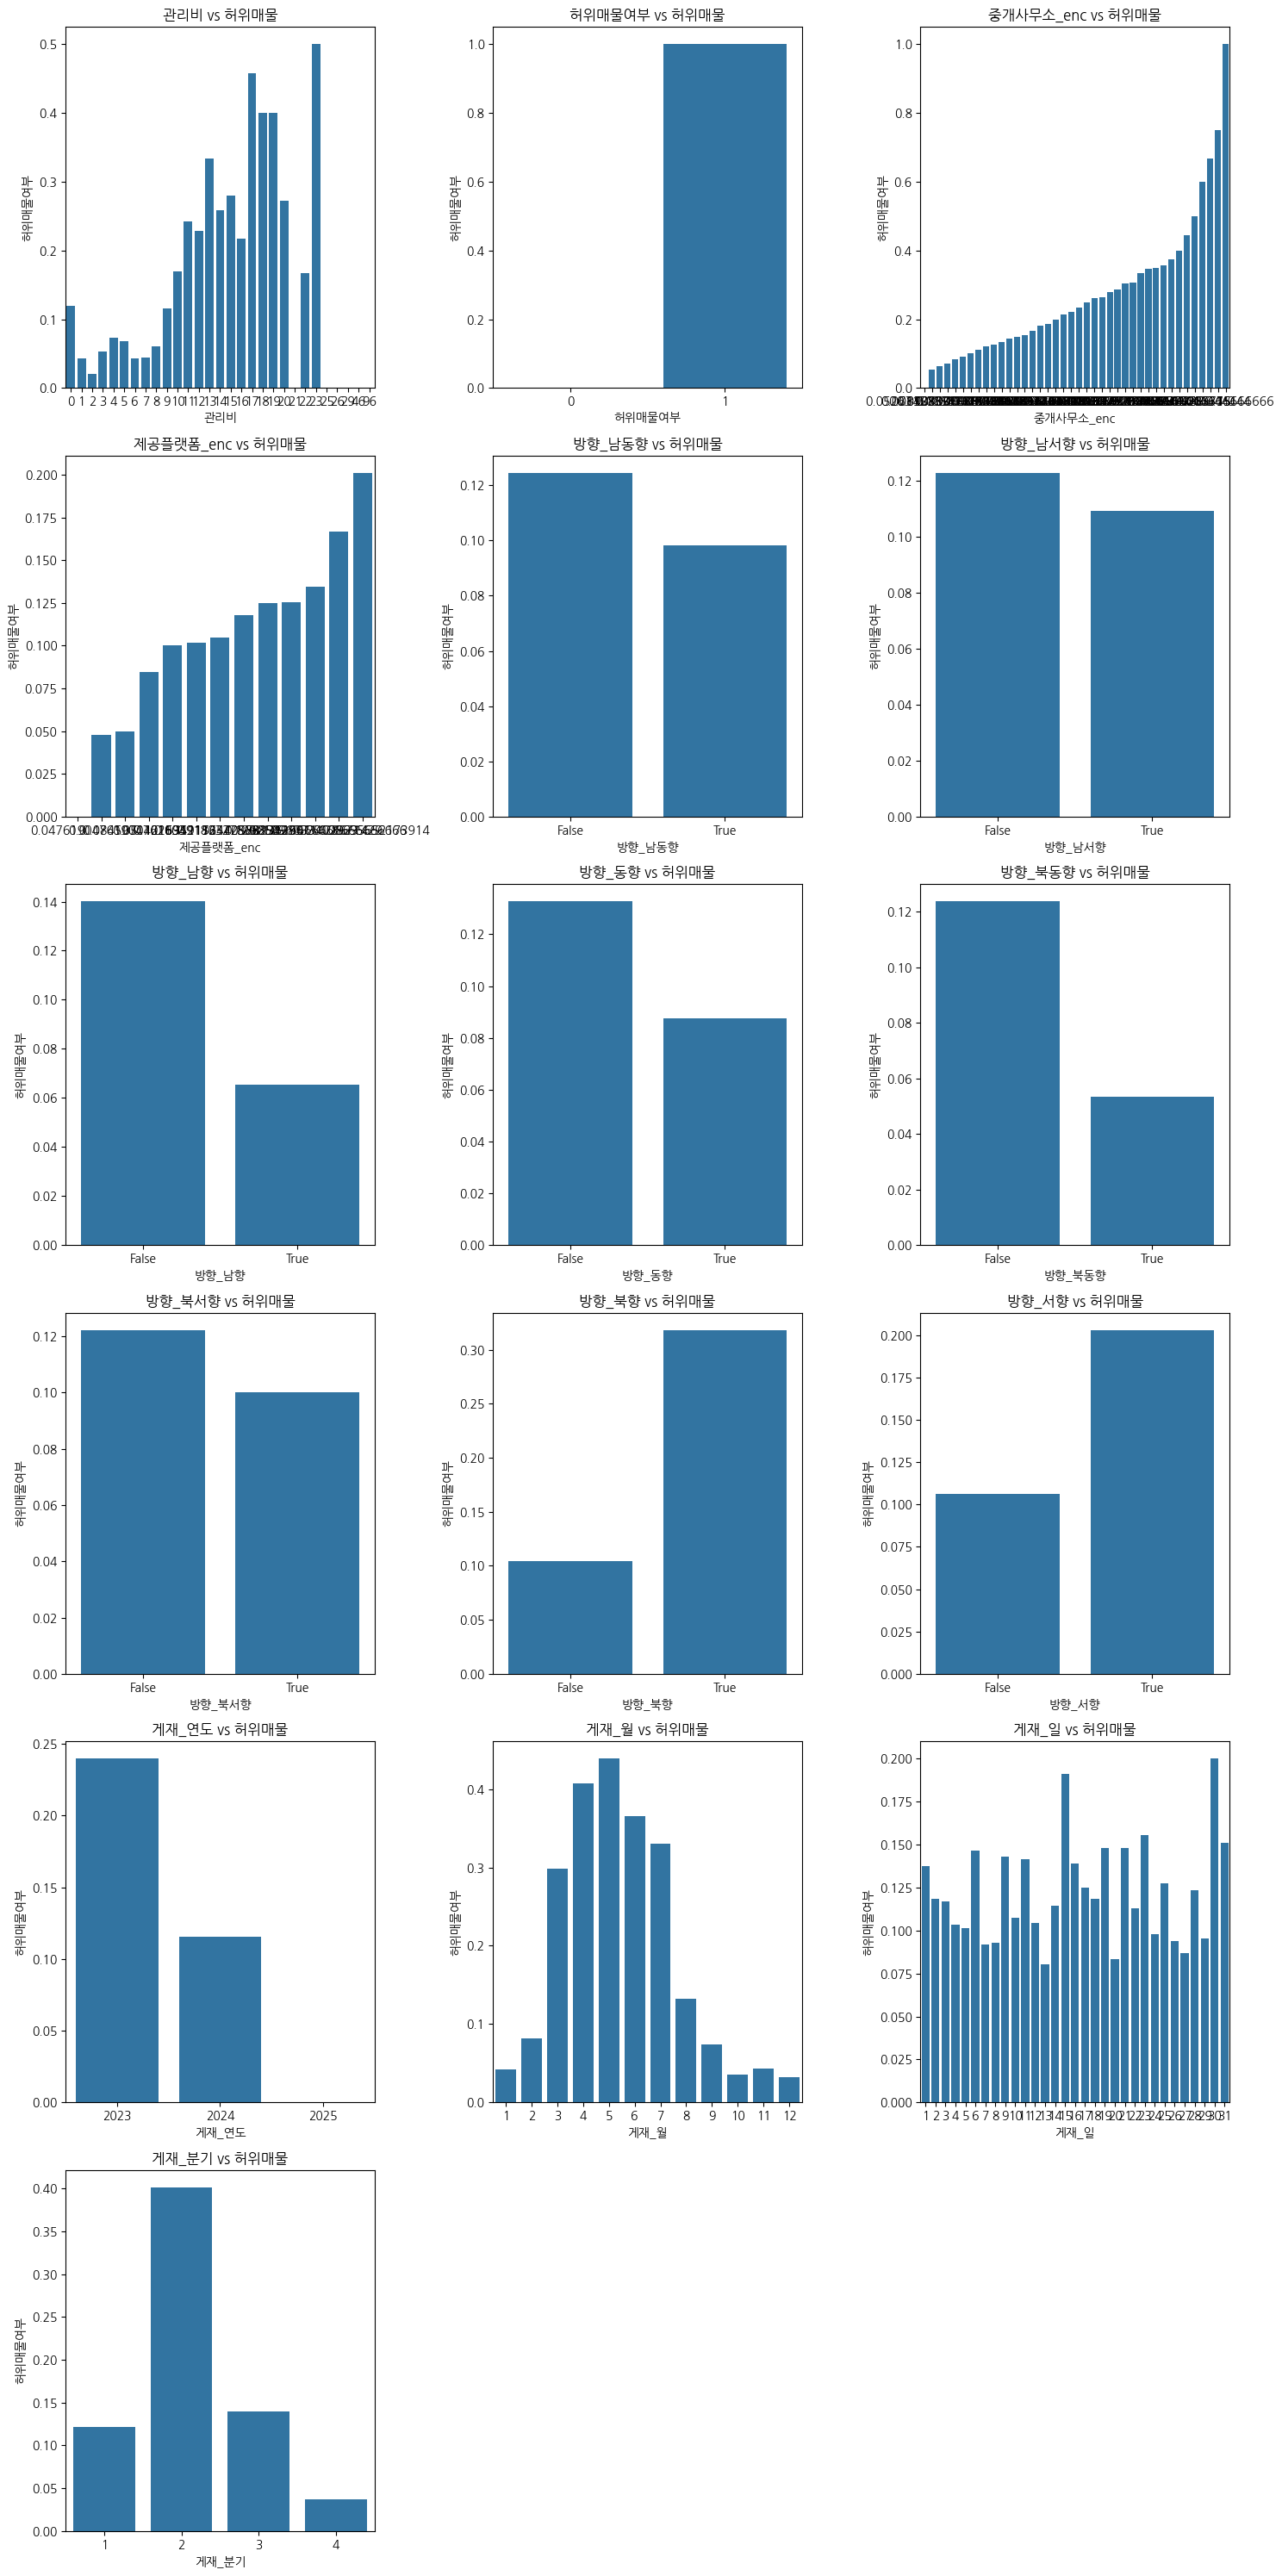

In [16]:
import math
categorical_cols = ['관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_남동향', '방향_남서향', '방향_남향', '방향_동향', '방향_북동향', '방향_북서향', '방향_북향', '방향_서향', '게재_연도', '게재_월', '게재_일', '게재_분기']

# 서브플롯 크기 계산 (최대 3열)
num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)  # 행 개수 자동 계산

plt.figure(figsize=(15, 5 * num_rows))  # 그래프 크기 조정

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # 자동으로 행 개수 조정
    sns.barplot(x=train[col], y=train['허위매물여부'], errorbar=None)  # `ci=None` 대신 `errorbar=None`
    plt.title(f"{col} vs 허위매물")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

<ipython-input-17-bfa77cb2d70f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-17-bfa77cb2d70f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-17-bfa77cb2d70f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
<ipython-input-17-bfa77cb2d70f>:12: FutureWarning: 

Passing `palette` without assigning

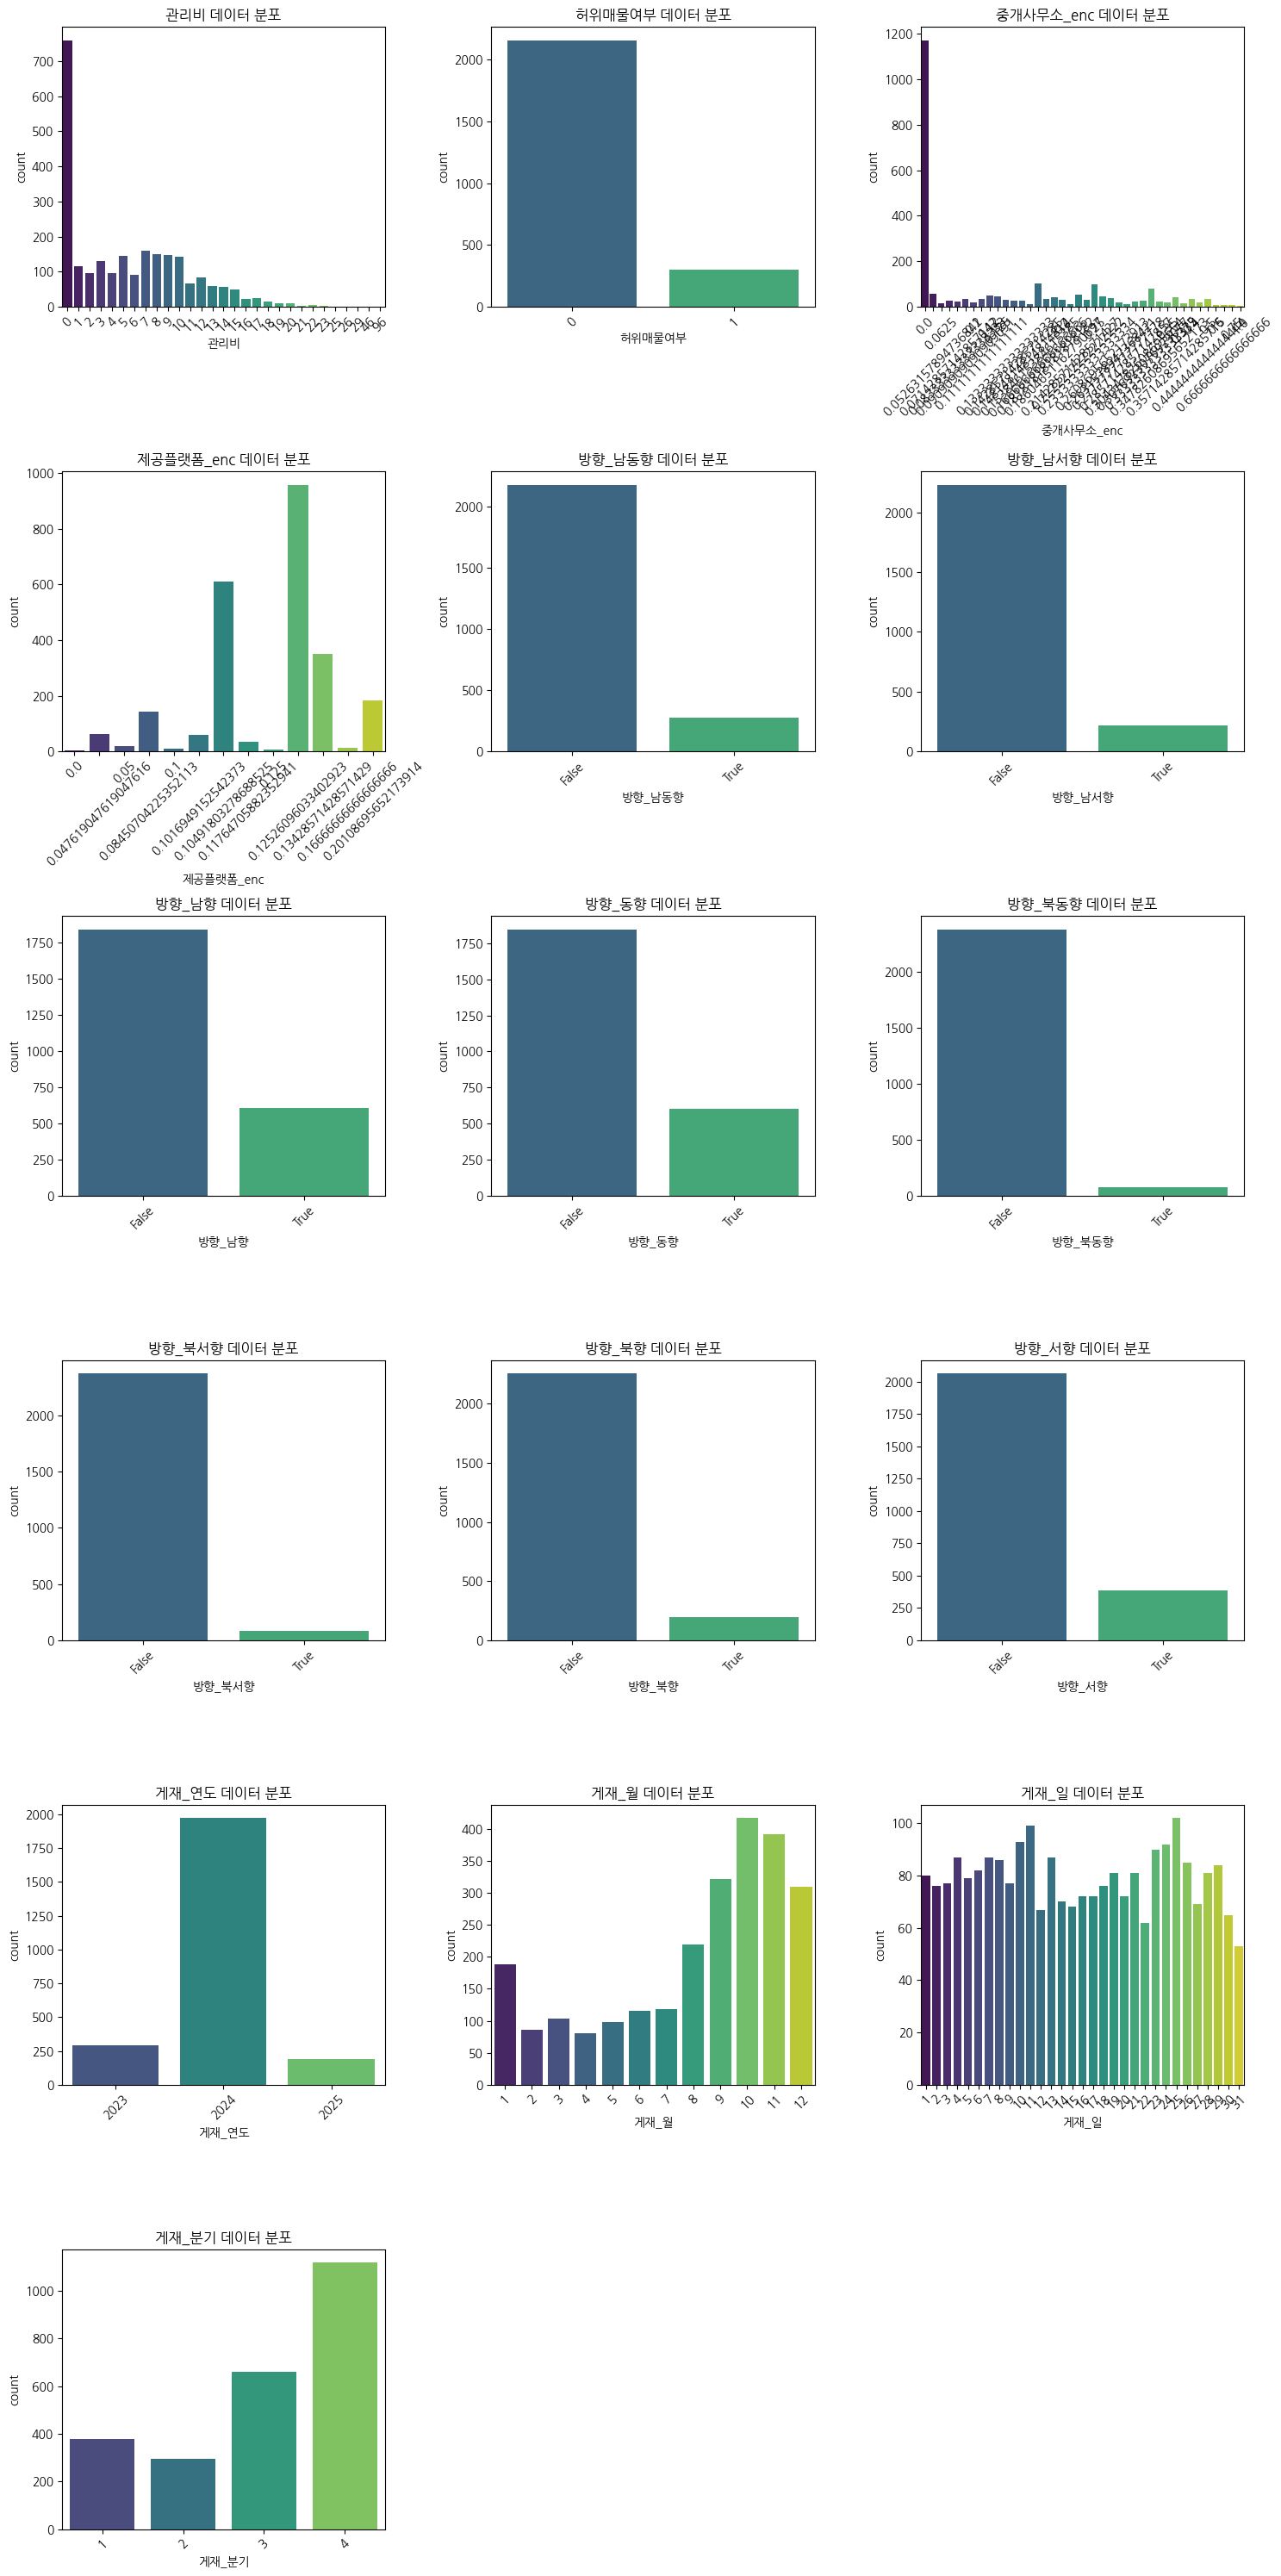

In [17]:
# 시각화할 범주형 변수 리스트
categorical_cols = ['관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_남동향', '방향_남서향', '방향_남향', '방향_동향', '방향_북동향', '방향_북서향', '방향_북향', '방향_서향', '게재_연도', '게재_월', '게재_일', '게재_분기']

# 서브플롯 크기 계산 (최대 3열)
num_cols = 3
num_rows = math.ceil(len(categorical_cols) / num_cols)  # 행 개수 자동 계산

plt.figure(figsize=(15, 5 * num_rows))  # 그래프 크기 조정

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # 자동으로 행 개수 조정
    sns.countplot(x=train[col], data=train, hue=None, palette='viridis', legend=False)
    plt.xticks(rotation=45)  # X축 라벨 회전
    plt.title(f"{col} 데이터 분포")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

In [20]:
columns_to_analyze = [
    '관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc',
    '방향_남동향', '방향_남서향', '방향_남향', '방향_동향',
    '방향_북동향', '방향_북서향', '방향_북향', '방향_서향',
    '게재_연도', '게재_월', '게재_일', '게재_분기'
]

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


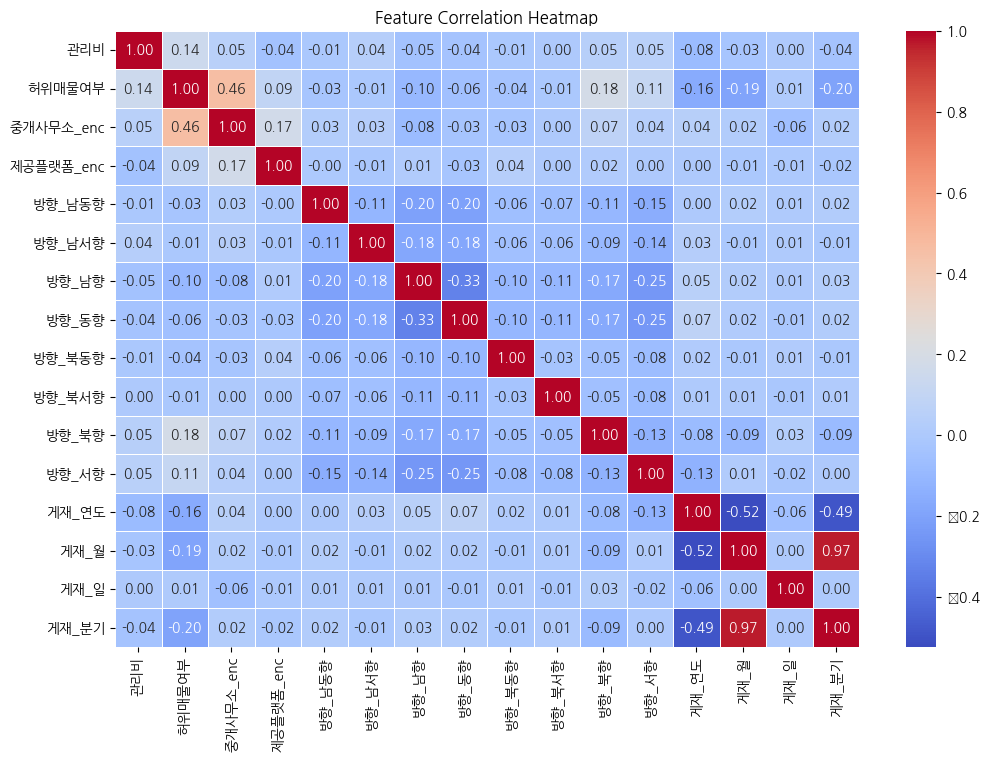

In [21]:
# 히트맵을 위한 상관행렬 계산
plt.figure(figsize=(12, 8))
sns.heatmap(train[columns_to_analyze].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# 다중공선성 확인을 위한 데이터프레임
X = train[['게재_연도', '게재_분기']]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
print(vif_data)

  Feature      VIF
0   게재_연도  1.25570
1   게재_분기  8.67183


In [24]:
for col in categorical_cols:
    print(train.groupby(col)['허위매물여부'].mean().sort_values(ascending=False))
    print("="*50)

관리비
23    0.500000
17    0.458333
19    0.400000
18    0.400000
13    0.333333
15    0.280000
20    0.272727
14    0.258621
11    0.242424
12    0.228916
16    0.217391
10    0.169014
22    0.166667
0     0.119895
9     0.115646
4     0.073684
5     0.068493
8     0.060000
3     0.053435
7     0.043750
6     0.043478
1     0.043103
2     0.020619
21    0.000000
25    0.000000
26    0.000000
29    0.000000
46    0.000000
96    0.000000
Name: 허위매물여부, dtype: float64
허위매물여부
1    1.0
0    0.0
Name: 허위매물여부, dtype: float64
중개사무소_enc
1.000000    1.000000
0.750000    0.750000
0.666667    0.666667
0.600000    0.600000
0.500000    0.500000
0.444444    0.444444
0.400000    0.400000
0.375000    0.375000
0.357143    0.357143
0.350000    0.350000
0.347826    0.347826
0.333333    0.333333
0.307692    0.307692
0.304348    0.304348
0.285714    0.285714
0.277778    0.277778
0.263158    0.263158
0.260870    0.260870
0.250000    0.250000
0.233333    0.233333
0.222222    0.222222
0.214286    0.214286
0.2000

# **250305 메모**

- 중개사무소_enc 포함
- 게재_연도, 게재_분기 포함
- 방향_북향, 방향_서향 포함
- 관리비 포함
- 제공플랫폼_enc 포함

# **피쳐 엔지니어링**

In [30]:
# 컬럼명을 리스트로 변환
print(train.columns.tolist())

['관리비', '허위매물여부', '중개사무소_enc', '제공플랫폼_enc', '방향_남동향', '방향_남서향', '방향_남향', '방향_동향', '방향_북동향', '방향_북서향', '방향_북향', '방향_서향', '게재_연도', '게재_월', '게재_일', '게재_분기']


In [31]:
keep_cols = ['관리비', '중개사무소_enc', '제공플랫폼_enc', '방향_북향', '방향_서향', '게재_연도', '게재_분기', '허위매물여부']

train = train[keep_cols]

In [32]:
keep_cols_test = ['관리비', '중개사무소_enc', '제공플랫폼_enc', '방향_북향', '방향_서향', '게재_연도', '게재_분기']

test = test[keep_cols_test]

In [33]:
print(len(test), len(sample_submission))

613 613


3. Modeling

In [34]:
# LightGBM & XGBoost
X = train.drop(columns=['허위매물여부'])
y = train['허위매물여부']

In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [36]:
# RandomForest 모델
rf_model = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')
print(f'RandomForest 평균 정확도: {np.mean(rf_scores):.4f}')

RandomForest 평균 정확도: 0.9502


In [37]:
# LightGBM
lgb_model = lgb.LGBMClassifier(n_estimators=300, max_depth=10, learning_rate=0.05, random_state=42)
lgb_scores = cross_val_score(lgb_model, X, y, cv=kf, scoring='accuracy')
print(f'LightGBM 평균 정확도: {np.mean(lgb_scores):.4f}')

[LightGBM] [Info] Number of positive: 235, number of negative: 1726
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 1961, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119837 -> initscore=-1.993976
[LightGBM] [Info] Start training from score -1.993976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [38]:
# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.05, random_state=42)
xgb_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')
print(f'XGBoost 평균 정확도: {np.mean(xgb_scores):.4f}')

XGBoost 평균 정확도: 0.9458


In [39]:
# 피처 중요도 시각화
rf_model.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

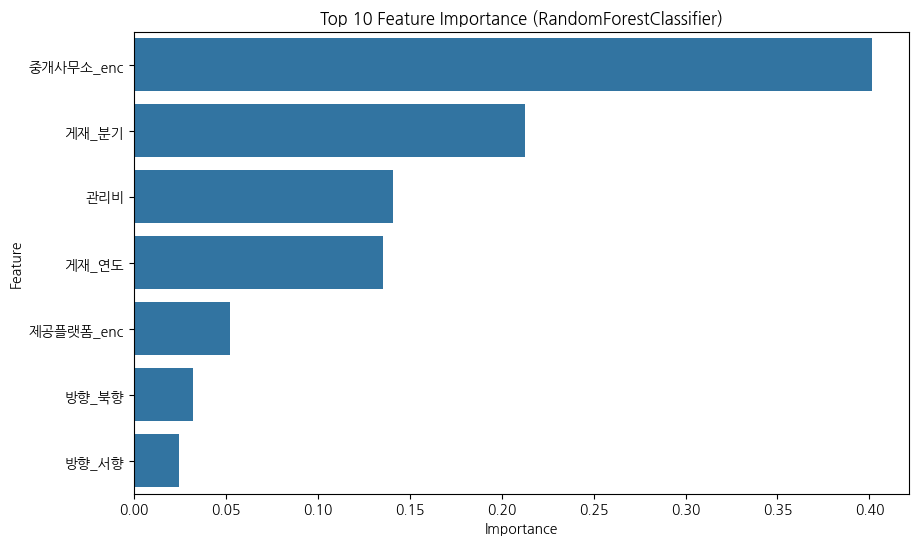

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances[:10])
plt.title('Top 10 Feature Importance (RandomForestClassifier)')
plt.show()

In [41]:
# test 데이터 예측
test_X = test

In [42]:
# 예측 수행
test_predictions = rf_model.predict(test_X)

In [43]:
# 결과 확인
print(test_predictions[:10])  # 상위 10개 출력

[0 0 1 0 0 0 0 0 0 0]


5. 제출파일 생성

In [44]:
# 제출 파일 생성
sample_submission['허위매물여부'] = test_predictions

In [45]:
sample_submission.head()

,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,1
3,TEST_003,0
4,TEST_004,0


In [46]:
sample_submission.to_csv('250305_submission_RFCmodeling.csv', index=False, encoding='utf-8-sig')